In [133]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# New Section

In [134]:
df=pd.read_csv("./ola_data.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count,registered
0,01/01/2011 00:00,Spring,No,Holiday,Clear,9.84,14.395,81,0.0,3,16,13
1,01/01/2011 01:00,Spring,No,Holiday,Clear,9.02,13.635,80,0.0,8,40,32
2,01/01/2011 02:00,Spring,No,Holiday,Clear,9.02,13.635,80,0.0,5,32,27
3,01/01/2011 03:00,Spring,No,Holiday,Clear,9.84,14.395,75,0.0,3,13,10
4,01/01/2011 04:00,Spring,No,Holiday,Clear,9.84,14.395,75,0.0,0,1,1


In [135]:
df.shape

(10886, 12)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  object 
 3   workingday  10886 non-null  object 
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  registered  10886 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1020.7+ KB


In [137]:
df.describe()

,temp,atemp,humidity,windspeed,casual,count,registered
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,191.574132,155.552177
std,7.79159,8.474601,19.245033,8.164537,49.960477,181.144454,151.039033
min,0.82000,0.760000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,42.000000,36.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,145.000000,118.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,284.000000,222.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,977.000000,886.000000


In [138]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
count         0
registered    0
dtype: int64

In [139]:

df = df.dropna()

In [140]:
df.duplicated().sum()

0

In [141]:
df = df.drop_duplicates()

In [142]:
# there are no null values and duplicated values in the data

In [143]:
df.shape

(10886, 12)

In [144]:
#numerical columns
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'count'],
      dtype=object)

In [145]:
#label encoding for converting categorical values to numerical values
le = LabelEncoder()

In [146]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

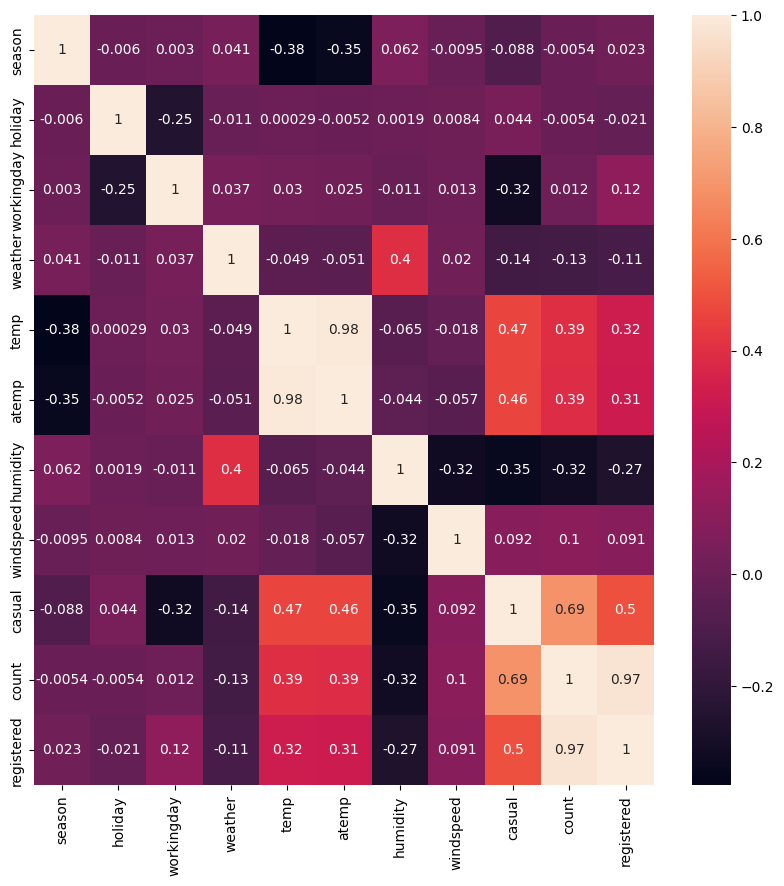

In [147]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [148]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count,registered
0,01/01/2011 00:00,1,0,0,0,9.84,14.395,81,0.0,3,16,13
1,01/01/2011 01:00,1,0,0,0,9.02,13.635,80,0.0,8,40,32
2,01/01/2011 02:00,1,0,0,0,9.02,13.635,80,0.0,5,32,27
3,01/01/2011 03:00,1,0,0,0,9.84,14.395,75,0.0,3,13,10
4,01/01/2011 04:00,1,0,0,0,9.84,14.395,75,0.0,0,1,1


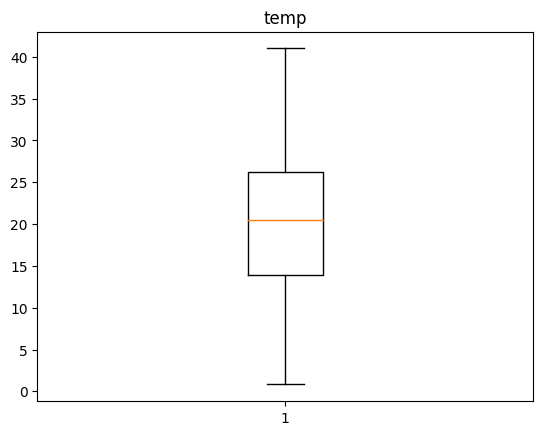

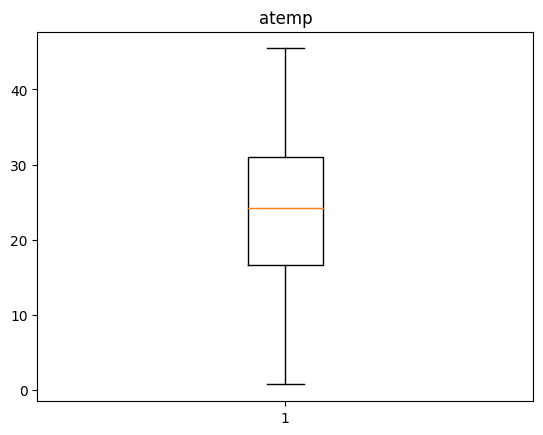

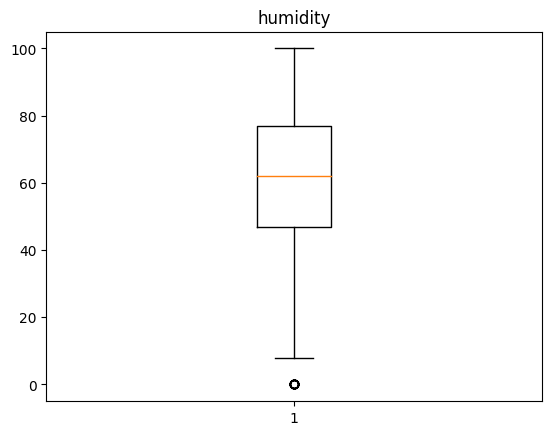

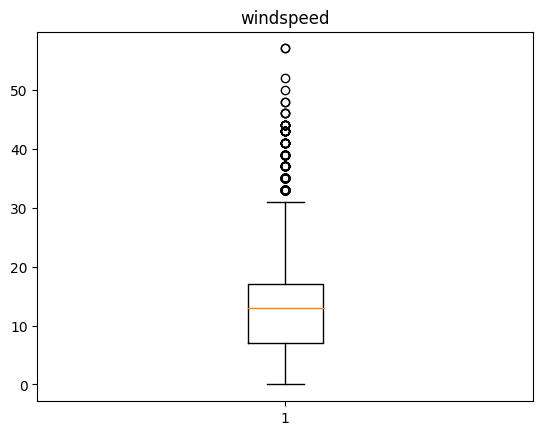

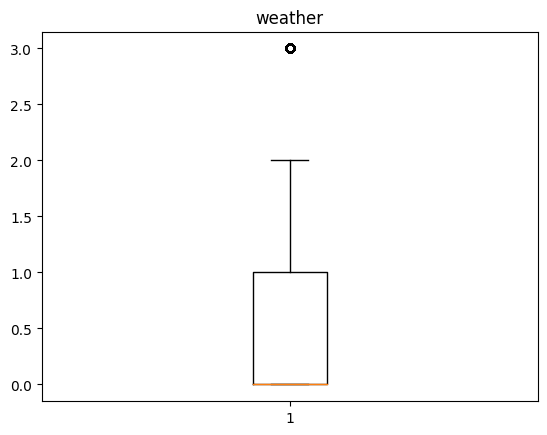

In [149]:
# Using boxplot to check for the outliers in the numerical data

plt.boxplot(df.temp)
plt.title('temp')
plt.show()

plt.boxplot(df.atemp)
plt.title('atemp')
plt.show()

plt.boxplot(df.humidity)
plt.title('humidity')
plt.show()

plt.boxplot(df.windspeed)
plt.title('windspeed')
plt.show()

plt.boxplot(df.weather)
plt.title('weather')
plt.show()



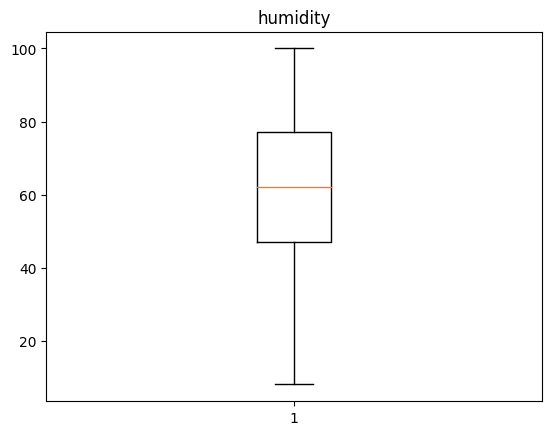

In [150]:
# removing outliers for humidity
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['humidity'] < Q1 - threshold * IQR) | (df['humidity'] > Q3 + threshold * IQR)]

#dropping outliers
df = df.drop(outliers.index)

plt.boxplot(df.humidity)
plt.title('humidity')
plt.show()

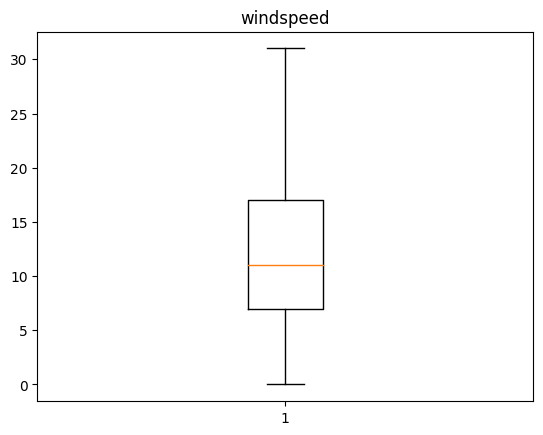

In [151]:
# removing outliers for windspeed
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['windspeed'] < Q1 - threshold * IQR) | (df['windspeed'] > Q3 + threshold * IQR)]

#dropping outliers
df = df.drop(outliers.index)

plt.boxplot(df.windspeed)
plt.title('windspeed')
plt.show()

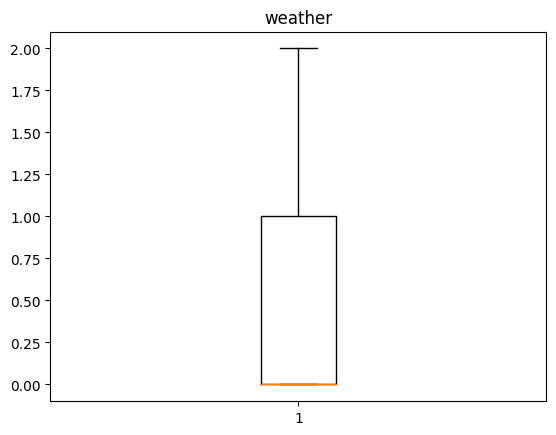

In [152]:
# removing outliers for weather
Q1 = df['weather'].quantile(0.25)
Q3 = df['weather'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['weather'] < Q1 - threshold * IQR) | (df['weather'] > Q3 + threshold * IQR)]

#dropping outliers
df = df.drop(outliers.index)

plt.boxplot(df.weather)
plt.title('weather')
plt.show()

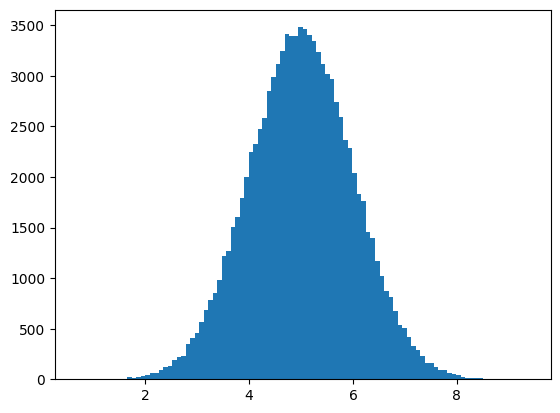

In [153]:
# normal distribution
y = df['registered'].values

x = np.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

In [154]:
# Divide the data into “Attributes” and “labels”

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [155]:
y.value_counts()

4      171
3      167
5      158
6      144
2      124
      ... 
703      1
778      1
637      1
764      1
546      1
Name: registered, Length: 724, dtype: int64

In [156]:
le = LabelEncoder()
y = le.fit_transform(y)

In [157]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [158]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [159]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count
7839,2,0,1,0,0.114547,0.134443,0.913504,-0.458541,-0.561813,-0.761798
2218,2,0,1,1,0.114547,0.134443,1.511209,-1.676147,-0.094024,1.487647
10879,3,0,1,0,-0.513360,-0.402811,-0.553589,1.842489,-0.243716,1.881826
10441,3,0,0,1,-0.931964,-0.850819,0.859167,-0.728717,0.654438,0.988354
7320,2,0,1,0,0.533151,0.582451,0.967841,-1.676147,-0.131447,0.473295
...,...,...,...,...,...,...,...,...,...,...
4303,3,0,1,1,0.323849,0.313528,1.239525,-0.728717,-0.150159,1.061934
9814,3,0,0,0,-1.036615,-1.029903,0.044116,-0.187458,-0.543101,-0.703985
10322,3,0,1,1,-0.722662,-0.671734,0.098453,-0.728717,-0.187582,0.047582
9637,3,0,1,0,0.533151,0.671698,0.696157,0.895059,0.448611,0.315623


In [160]:
# Create a Linear Regression model and fit it
lr =LinearRegression()
model = lr.fit(X_train,y_train)

In [161]:
# Predicting the data
y_predict=model.predict(X_test)
y_predict

array([ 50.83410492, 421.95632014, 498.99237229, ..., 175.56134261,
       192.69247113, 154.33207085])

In [162]:
from sklearn.metrics import accuracy_score
r2_score(y_predict,y_test)

0.9944386415544326

In [163]:
# Decision Tree Regressor
DT=DecisionTreeRegressor()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=r2_score(y_test,dt_pred)*100
(dt_acc_score)

99.52896014313464

In [164]:
# Random Forest Regressor
RF=RandomForestRegressor()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=r2_score(y_test,rf_pred)*100
(rf_acc_score)

99.6170448870978

# linear regression  : 99.44
# Decision Tree Regressor : 99.52
# Random Forest Regressor : 99.61

# Out of all these models Random Forest Regressor outperformed with an accuracy of 99.61%